In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from folium import folium
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegressionCV
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn import cluster 
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
#!pip install folium
from folium.plugins import HeatMap
import folium
import scipy
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [16]:
#  Reading Data
rawdat=pd.read_csv(r'C:\Users\rramn\Documents\IDS_575\us_accidents\us_accidents.csv')
df=rawdat


In [17]:
# Extract year, month, day, hour, & weekday information
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))


In [21]:
#df.to_csv(r'C:\Users\rramn\Documents\IDS_575\us_accidents\us_accidents_new.csv',index=False)
# Exploratory Data Analysis


dfnew=df.drop(['ID','Source','Number'],axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 52 columns):
TMC                      38159 non-null float64
Severity                 50564 non-null int64
Start_Time               50564 non-null datetime64[ns]
End_Time                 50564 non-null datetime64[ns]
Start_Lat                50564 non-null float64
Start_Lng                50564 non-null float64
End_Lat                  12405 non-null float64
End_Lng                  12405 non-null float64
Distance(mi)             50564 non-null float64
Description              50564 non-null object
Street                   50564 non-null object
Side                     50564 non-null object
City                     50562 non-null object
County                   50564 non-null object
State                    50564 non-null object
Zipcode                  50556 non-null object
Country                  50564 non-null object
Timezone                 50528 non-null object
Airport_Code            

In [25]:
#Convert object to column type
dfnew[dfnew.select_dtypes(['object']).columns] = dfnew.select_dtypes(['object']).apply(lambda x: x.astype('category'))

dfnew['TMC']=dfnew['TMC'].astype('category')
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 52 columns):
TMC                      38159 non-null category
Severity                 50564 non-null int64
Start_Time               50564 non-null datetime64[ns]
End_Time                 50564 non-null datetime64[ns]
Start_Lat                50564 non-null float64
Start_Lng                50564 non-null float64
End_Lat                  12405 non-null float64
End_Lng                  12405 non-null float64
Distance(mi)             50564 non-null float64
Description              50564 non-null category
Street                   50564 non-null category
Side                     50564 non-null category
City                     50562 non-null category
County                   50564 non-null category
State                    50564 non-null category
Zipcode                  50556 non-null category
Country                  50564 non-null category
Timezone                 50528 non-null category
Airpo

In [38]:
#Baseline model - Uniform random prediction which we removed later
y=dfnew['Severity']
x=dfnew.drop(['Severity'],axis=1)
d=DummyClassifier(strategy='uniform')
d.fit(x,y)
yp=d.predict(x)
metrics.accuracy_score(yp,y)

0.2491495925955225

In [36]:
# Baseline model - Stratified Random prediction which we removed later
dst=DummyClassifier(strategy='stratified')
dst.fit(x,y)
ypst=d.predict(x)
metrics.accuracy_score(ypst,y)
#ypst


0.24893204651530734

In [52]:
#Heat map 
def plot_map1(LatLong, city=None):
    accident_map = folium.Map(location=LatLong, 
                           tiles = "Stamen Toner",
                           zoom_start = 10)
    if city != None:
        data_heatmap = df[df["City"] == city]
    else:
        data_heatmap = df.copy()
    data_heatmap = data_heatmap[['Start_Lat','Start_Lng']]
    data_heatmap = [[row['Start_Lat'],row['Start_Lng']] for index, row in data_heatmap.iterrows()]
    HeatMap(data_heatmap, radius=10).add_to(accident_map)
    return accident_map

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [84]:
dfcopy=df.copy()
df[df['City']=='New York'].shape
#plot_map1([40,-74])
#dfcopy['count'] = 1
#base_map = generateBaseMap()
#HeatMap(data=dfcopy[['Start_Lat', 'Start_Lng', 'count']].groupby(['Start_Lat', 'Start_Lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

(112, 55)

In [85]:
#dfcopy.isna().sum()
#dfcopy=dfcopy.dropna(axis=0)
dfcopy[dfcopy.select_dtypes(['object']).columns] = dfcopy.select_dtypes(['object']).apply(lambda x: x.astype('category'))
dfcopy=dfcopy.drop(['ID','Source','End_Lat','End_Lng','Number','Street','Wind_Chill(F)','Precipitation(in)'],axis=1)

In [86]:
dfcopy=dfcopy.dropna(axis=0)
dfcopy.isna().sum()
dfcopy.shape

(32136, 47)

In [91]:
#Label encoding
y=dfcopy['Severity']
y=y.astype('category')
x=dfcopy.drop(['Severity'],axis=1)
cat_columns=x.select_dtypes(['category']).columns
cat_columns
x[cat_columns]=x[cat_columns].apply(lambda x: x.cat.codes)
y=y.cat.codes

In [97]:
#Baseline model - Old one which we removed later
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
d=DummyClassifier(strategy='uniform')
d.fit(x_train,y_train)
yp=d.predict(x_test)
print(metrics.accuracy_score(yp,y_test))
print(metrics.f1_score(yp,y_test,average='weighted'))

0.24758842443729903
0.16076498889239157


In [98]:
df['Severity'].value_counts()

2    33909
3    15081
4     1560
1       14
Name: Severity, dtype: int64

In [2]:
accidat=pd.read_excel(r'C:\Users\rramn\Documents\IDS_575\us_accidents\us_accidents_new.xlsx')

In [3]:
#np.sum(accidat.isna())
#accidat.info()
accidat['Severity'].value_counts()
temp=accidat

In [4]:
#np.sum(temp.isna())
temp=temp.dropna(axis=0)

In [5]:
dfnew=temp
#Convert object to column type
dfnew[dfnew.select_dtypes(['object','bool']).columns] = dfnew.select_dtypes(['object','bool']).apply(lambda x: x.astype('category'))
dfnew['Severity']=dfnew['Severity'].astype('category')
dfnew['Start_Year']=dfnew['Start_Year'].astype('category')
dfnew.info()

C:\Users\rramn\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\rramn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rramn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49027 entries, 0 to 50563
Data columns (total 38 columns):
TMC                      49027 non-null category
Severity                 49027 non-null category
Start_Lat                49027 non-null float64
Start_Lng                49027 non-null float64
Distance(mi)             49027 non-null float64
Side                     49027 non-null category
State                    49027 non-null category
Timezone                 49027 non-null category
Temperature(F)           49027 non-null float64
Humidity(%)              49027 non-null float64
Pressure(in)             49027 non-null float64
Visibility(mi)           49027 non-null float64
Wind_Direction           49027 non-null category
Wind_Speed(mph)          49027 non-null float64
Weather_Condition        49027 non-null category
Amenity                  49027 non-null category
Bump                     49027 non-null category
Crossing                 49027 non-null category
Give_Way         

In [27]:
#dfnew.to_excel(r'C:\Users\rramn\Documents\IDS_575\us_accidents\us_accidents_r.xlsx')

In [6]:
#Support Vector Classifier
#Parameter Tuning
y=dfnew['Severity']
x=dfnew.drop(['Severity'],axis=1)
cat_columns=x.select_dtypes(['category']).columns
cat_columns
x[cat_columns]=x[cat_columns].apply(lambda x: x.cat.codes)
y=y.cat.codes



In [ ]:
#Parameter Tuning
scoring=['precision_macro','recall_macro']
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-8],'C': [1, 10, 100, 1000]}]
ptsvm=svm.SVC()
#dist={'C':scipy.stats.expon(scale=100), 'gamma':scipy.stats.expon(scale=.1),'kernel': ['rbf']}
#ptclf=RandomizedSearchCV(ptsvm,dist,random_state=0,cv=5,scoring=scoring,return_train_score=True,refit='f1_macro')
ptclf=GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=3,scoring=scoring,refit='precision_macro')
search=ptclf.fit(x,y)

C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\m

In [ ]:
#xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(x,y,test_size=0.3)
#ssvm=OneVsRestClassifier(svm.SVC(C=1000,kernel='linear'))
#ssvm=OneVsRestClassifier(svm.SVC(C=1000,kernel='rbf',gamma=1e-8))
#scores=cross_val_score(ssvm,x,y,scoring='f1_weighted',cv=5)

#sorted(sklearn.metrics.SCORERS.keys())

#np.mean(scores)

In [ ]:
#SVM Final model
y = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y.shape[1]
xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(x,y,test_size=0.3)
#finalsvm=OneVsRestClassifier(svm.SVC(C=1000,kernel='linear'))
finalsvm=OneVsRestClassifier(svm.SVC(C=1000,kernel='rbf',gamma=1e-8))
finalsvm.fit(xcl_train,ycl_train)



In [19]:
pr=finalsvm.predict(xcl_test)
y_score=finalsvm.decision_function(xcl_test)

In [26]:
trainpr=finalsvm.predict(xcl_train)
print(metrics.f1_score(trainpr,ycl_train,average="weighted"))
print(metrics.precision_score(trainpr,ycl_train,average="weighted"))
print(metrics.recall_score(trainpr,ycl_train,average="weighted"))
print(metrics.accuracy_score(trainpr,ycl_train))

print(metrics.f1_score(pr,ycl_test,average="weighted"))
print(metrics.precision_score(pr,ycl_test,average="weighted"))
print(metrics.recall_score(pr,ycl_test,average="weighted"))
print(metrics.accuracy_score(pr,ycl_test))

0.8046541844781311
0.999667335940218
0.6734223725650298
0.6729121743691358
0.8022166082633851
0.9997968718261223
0.6698421339139902
0.6692501189747774


C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rramn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [22]:
# PR curve for each class 
precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i] ,_= precision_recall_curve(ycl_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ycl_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["weighted"], recall["weighted"], _ = precision_recall_curve(ycl_test.ravel(),
    y_score.ravel())
average_precision["weighted"] = average_precision_score(ycl_test, y_score,average="weighted")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["weighted"]))


Average precision score, micro-averaged over all classes: 0.69


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.69')

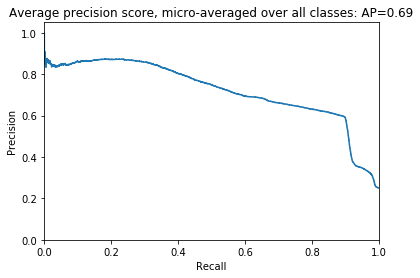

In [23]:
# Plot the weighted-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['weighted'], precision['weighted'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["weighted"]))



numpy.ndarray

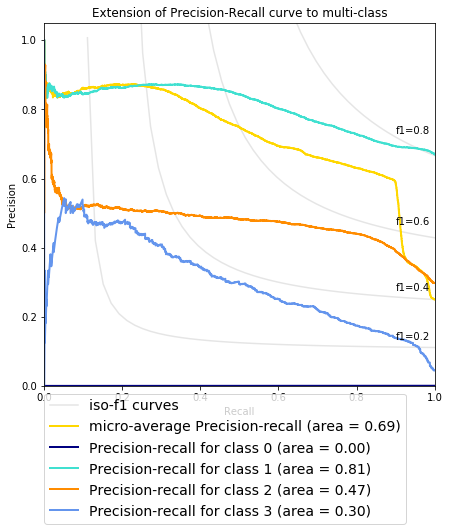

In [24]:
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    X = np.linspace(0.01, 1)
    Y = f_score * X / (2 * X - f_score)
    l, = plt.plot(X[Y >= 0], Y[Y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, Y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["weighted"], precision["weighted"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["weighted"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [16]:
np.max(ycl_test)


3